## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.21.6'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [ ]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-10,118.7800,120.9200,118.4100,119.7000,30930350
2022-08-09,117.1350,117.3200,115.7100,116.6300,19086465
2022-08-08,118.3900,120.1500,116.8800,117.3000,19169479
2022-08-05,116.2300,118.1056,116.0000,117.4700,19159520
2022-08-04,117.4800,118.7800,116.8900,118.1900,21602925
...,...,...,...,...,...
2017-08-18,46.3490,46.5510,46.1725,46.3090,26712200
2017-08-17,47.1475,47.1905,46.3820,46.3830,33477720
2017-08-16,47.0625,47.4950,47.0020,47.2135,26867840


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-08-10 to 2017-08-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [ ]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,81.812777,82.689334,80.933731,81.837529,3.528864e+07
std,31.781457,32.098914,31.398785,31.745811,1.602841e+07
min,45.997500,46.412500,45.930000,46.043500,9.312760e+06
25%,56.481500,57.068000,55.795000,56.431500,2.517998e+07
50%,66.943000,67.571500,66.336500,66.985500,3.140872e+07
75%,111.422000,113.160000,110.336000,111.778000,4.014388e+07
max,151.250000,151.547000,148.899000,149.838000,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
pd.set_option('precision', 2)

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,81.81,82.69,80.93,81.84,35288635.66
std,31.78,32.10,31.40,31.75,16028405.73
min,46.00,46.41,45.93,46.04,9312760.00
25%,56.48,57.07,55.80,56.43,25179980.00
50%,66.94,67.57,66.34,66.99,31408720.00
75%,111.42,113.16,110.34,111.78,40143880.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

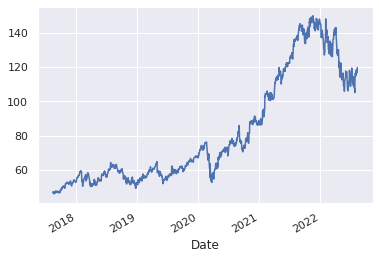

In [ ]:
_=google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [ ]:
google.reset_index(inplace=True)

Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [ ]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google.head()

,Date,Open,High,Low,Close,Volume,Month,Year
0,2022-08-10,118.78,120.92,118.41,119.70,30930350,8,2022
1,2022-08-09,117.14,117.32,115.71,116.63,19086465,8,2022
2,2022-08-08,118.39,120.15,116.88,117.30,19169479,8,2022
3,2022-08-05,116.23,118.11,116.00,117.47,19159520,8,2022
4,2022-08-04,117.48,118.78,116.89,118.19,21602925,8,2022


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [ ]:
close = google.groupby('Year').Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

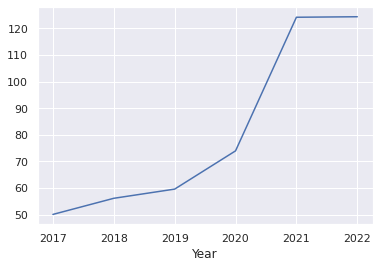

In [ ]:
_=close.plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [ ]:
close_month = google.groupby('Month').Close.mean()

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

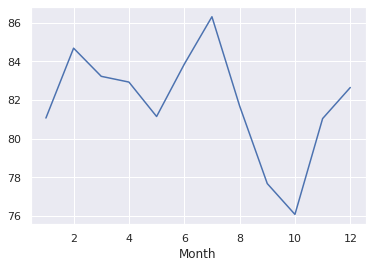

In [ ]:
close_month.plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [ ]:
google.groupby(['Year','Month']).Close.mean()

Year  Month
2017  8        46.82
      9        47.29
      10       49.96
      11       52.35
      12       52.69
               ...  
2022  4       128.07
      5       113.19
      6       112.43
      7       112.65
      8       117.17
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [ ]:
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2022-08-10,118.78,120.92,118.41,119.70,30930350
2022-08-09,117.14,117.32,115.71,116.63,19086465
2022-08-08,118.39,120.15,116.88,117.30,19169479
2022-08-05,116.23,118.11,116.00,117.47,19159520
2022-08-04,117.48,118.78,116.89,118.19,21602925
...,...,...,...,...,...
2017-08-18,46.35,46.55,46.17,46.31,26712200
2017-08-17,47.15,47.19,46.38,46.38,33477720
2017-08-16,47.06,47.49,47.00,47.21,26867840


In [ ]:
id=google['Close'].idxmax()

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [ ]:
google.iloc[[181]]

,Otwarcie,Najwyzszy,Close,Zamkniecie,Wolumen
Date,,,,,
2021-11-18,148.24,150.58,147.88,149.84,35628220


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [ ]:
google[['Date','Open','Close','Volume']]

,Date,Open,Close,Volume
0,2022-08-10,118.78,119.70,30930350
1,2022-08-09,117.14,116.63,19086465
2,2022-08-08,118.39,117.30,19169479
3,2022-08-05,116.23,117.47,19159520
4,2022-08-04,117.48,118.19,21602925
...,...,...,...,...
1252,2017-08-18,46.35,46.31,26712200
1253,2017-08-17,47.15,46.38,33477720
1254,2017-08-16,47.06,47.21,26867840
1255,2017-08-15,47.05,46.90,22073840


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [ ]:
google.set_index('Date', inplace=True)
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2022-08-10,118.78,120.92,118.41,119.70,30930350,8,2022
2022-08-09,117.14,117.32,115.71,116.63,19086465,8,2022
2022-08-08,118.39,120.15,116.88,117.30,19169479,8,2022
2022-08-05,116.23,118.11,116.00,117.47,19159520,8,2022
2022-08-04,117.48,118.78,116.89,118.19,21602925,8,2022
...,...,...,...,...,...,...,...
2017-08-18,46.35,46.55,46.17,46.31,26712200,8,2017
2017-08-17,47.15,47.19,46.38,46.38,33477720,8,2017
2017-08-16,47.06,47.49,47.00,47.21,26867840,8,2017


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google=google.drop(columns=['Year','Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-10,118.78,120.92,118.41,119.70,30930350
2022-08-09,117.14,117.32,115.71,116.63,19086465
2022-08-08,118.39,120.15,116.88,117.30,19169479
2022-08-05,116.23,118.11,116.00,117.47,19159520
2022-08-04,117.48,118.78,116.89,118.19,21602925
...,...,...,...,...,...
2017-08-18,46.35,46.55,46.17,46.31,26712200
2017-08-17,47.15,47.19,46.38,46.38,33477720
2017-08-16,47.06,47.49,47.00,47.21,26867840


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
google.columns=['Otwarcie','Najwyzszy','Close','Zamkniecie','Wolumen']
google

,Otwarcie,Najwyzszy,Close,Zamkniecie,Wolumen
Date,,,,,
2022-08-10,118.78,120.92,118.41,119.70,30930350
2022-08-09,117.14,117.32,115.71,116.63,19086465
2022-08-08,118.39,120.15,116.88,117.30,19169479
2022-08-05,116.23,118.11,116.00,117.47,19159520
2022-08-04,117.48,118.78,116.89,118.19,21602925
...,...,...,...,...,...
2017-08-18,46.35,46.55,46.17,46.31,26712200
2017-08-17,47.15,47.19,46.38,46.38,33477720
2017-08-16,47.06,47.49,47.00,47.21,26867840
